# Analysis on Mobile Device Usage

**Cristian Garcia Flores**

The role and use of social media continue to be widely discussed as digital platforms evolve. With the increasing integration of apps into daily life, understanding their impact has become more important than ever. This project analyzes some data from five US cities, focusing on factors such as daily screen time, and the number of apps used. By exploring these patterns, we aim to gain insights into how digital devices are used.

The dataset used is publically available to view and download from Kaggle: https://www.kaggle.com/datasets/bhadramohit/smartphone-usage-and-behavioral-dataset/data  

## Install dependencies and import data

Lets start by initializing our data

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
usage_df = pd.read_csv("mobile_usage_behavioral_analysis.csv")
usage_df.shape

(1000, 10)

In [3]:
usage_df.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [4]:
usage_df.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,288.819436,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,1.000000,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,250.750000,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,500.500000,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,750.250000,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,1000.000000,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


Let us see what locations we are working with

In [5]:
unique_locations = usage_df['Location'].unique()

print(unique_locations)

['Los Angeles' 'Chicago' 'Houston' 'Phoenix' 'New York']


Check for any missing data

## Visualization

From our dataset we see that we have 5 catagories which messures the amount of hours a person spends doing different things on their mobile device.

- Total_App_Usage_Hours: This tells us total hours spent on mobile apps in a day
- Daily_Screen_Time_Hours: This tells us the total screen time recorded for each individual. This can be a combination of other features in the data plus any downtime where the screen was left on or task which did not fall into one of the features of the dataset
- Social_Media_Usage_Hours: This tells us the hours dedicated to social media apps
- Productivity_App_Usage_Hours: This tells us the hours dedicated to productivity-related apps
- Gaming_App_Usage_Hours: his tells us the hours spent on gaming apps

Lets go through each age group and plot the mean of the features mentioned above on a heat map.
This will give us some insight on where each age group is spending the most time where and where they are not

Since the data has a range of ages from 18 to 59, it would be best to group ages together. Not only to reduce visual clutter, but to also to make it eaiser to sperate young people from older people. For this I will use bins of 10 year intervals, so grouping years 18-27, etc.

C:\Users\crist\AppData\Local\Temp\ipykernel_10512\2622132746.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = usage_df.pivot_table(values=['Total_App_Usage_Hours', 'Daily_Screen_Time_Hours',


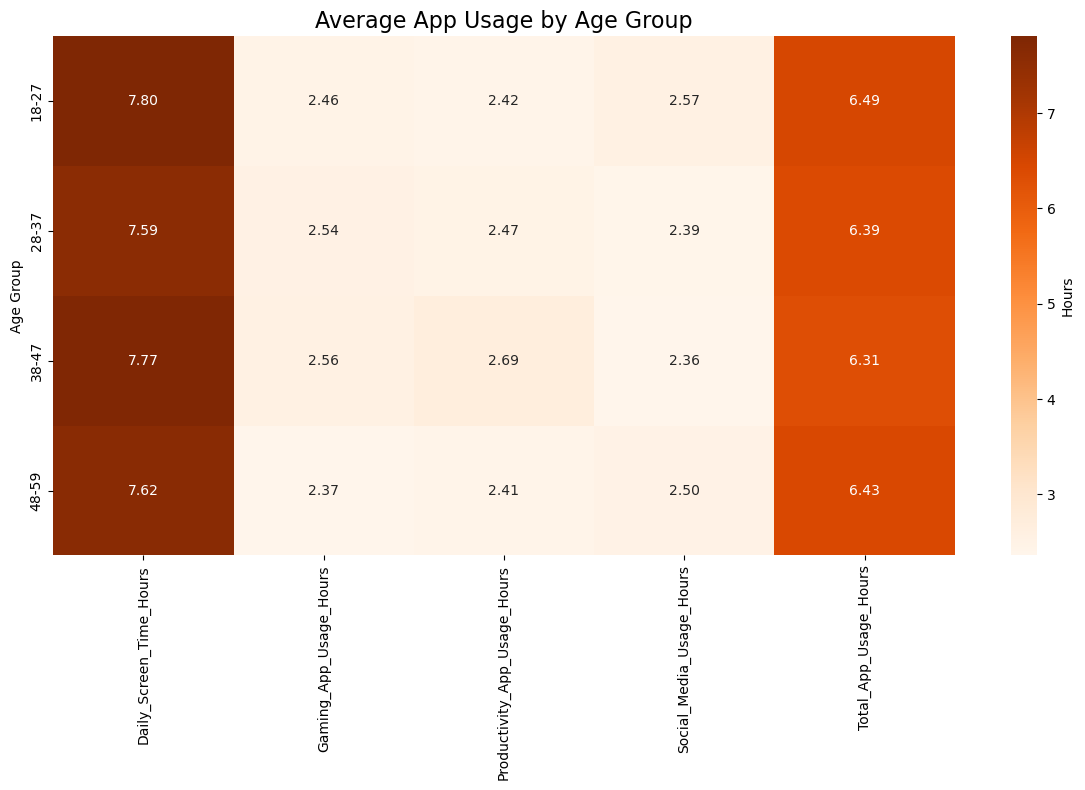

In [6]:
# Define bins and labels
bins = [18, 28, 38, 48, 59]
labels = ['18-27', '28-37', '38-47', '48-59']

# Apply the binning
usage_df['Age Group'] = pd.cut(usage_df['Age'], bins=bins, labels=labels, right=False)

# 59 is excluded, so manually set those in age 59 to be in group '48-59'
usage_df.loc[usage_df['Age'] == 59, 'Age Group'] = '48-59'

# Pivot table using Age Groups
pivot = usage_df.pivot_table(values=['Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 
                                     'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 
                                     'Gaming_App_Usage_Hours'], 
                             index='Age Group', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap="Oranges", annot=True, fmt=".2f", cbar_kws={'label': 'Hours'})
plt.title('Average App Usage by Age Group', fontsize=16)
plt.tight_layout()
plt.show()

#### Lets go through the results
1. Daily Screen Time: The 18-27 age group spends the most time on screens, while the 28-37 group spends the least.
2. Gaming App Usage: The 38-47 group spends the most time gaming, while 18-27 and 48-59 have the lowest usage.
3. Productivity App Usage: Highest in the 38-47 group, with the 48-59 group having the lowest.
4. Social Media Usage: The 18-27 group has the highest usage, while 38-47 has the lowest.
5. Total App Usage: The 18-27 group has the highest overall app usage, whereas 38-47 has the lowest.

Lets compare the daily screen usage between males and females across each age group.

C:\Users\crist\AppData\Local\Temp\ipykernel_10512\627130908.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_screen_time = usage_df.groupby(['Age Group', 'Gender'])['Daily_Screen_Time_Hours'].mean().unstack()


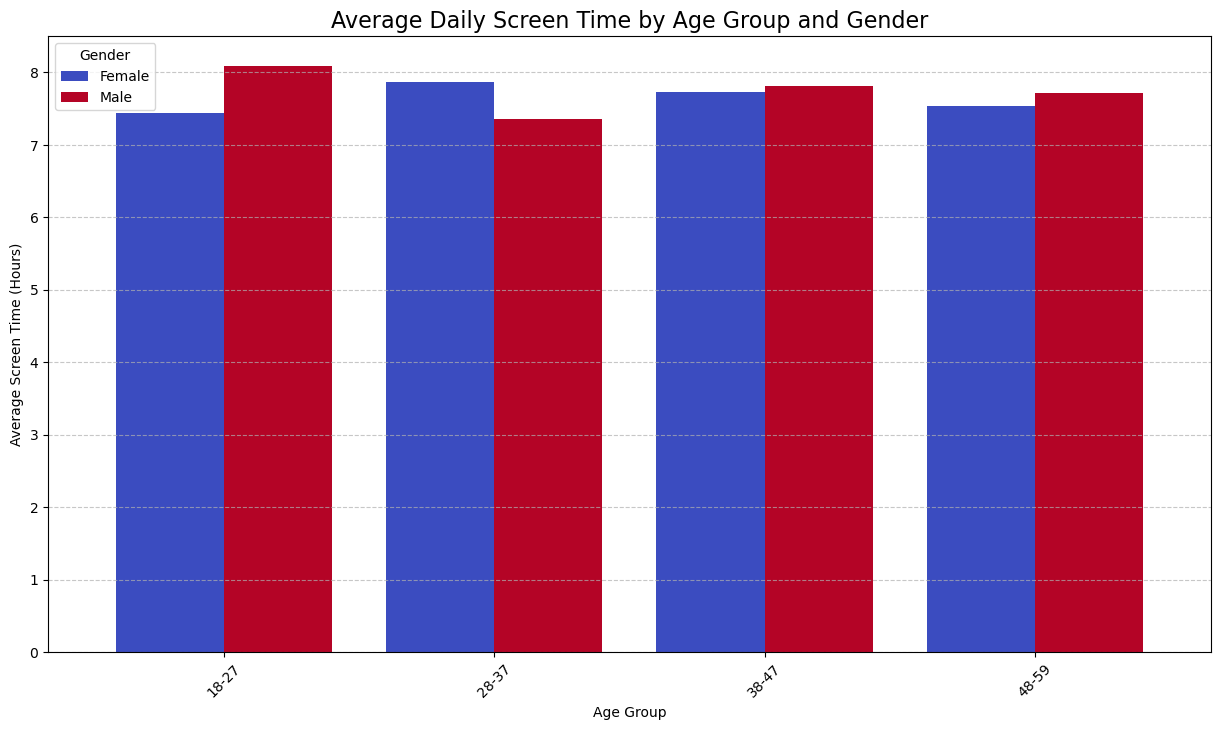

In [7]:
# Group by Age Group and Gender, then calculate average screen time
age_gender_screen_time = usage_df.groupby(['Age Group', 'Gender'])['Daily_Screen_Time_Hours'].mean().unstack()

age_gender_screen_time.plot(kind='bar', figsize=(15, 8), colormap='coolwarm', width=0.8)

plt.title('Average Daily Screen Time by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Average Screen Time (Hours)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

From the chart we can see males spend the most time on their screens for all age groups besides 28-37, with the average for every group being above 7 hours

#### Let see if we can find a relationship between number of apps used and the amount of daily screen time


C:\Users\crist\AppData\Local\Temp\ipykernel_10512\645726271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=usage_df['Number_of_Apps_Used'], y=usage_df['Daily_Screen_Time_Hours'], palette='coolwarm')


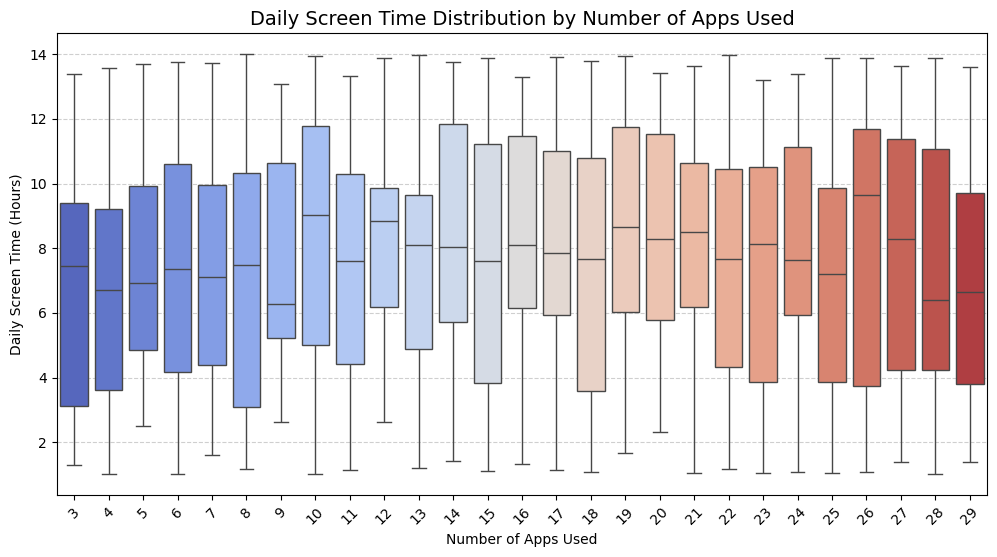

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=usage_df['Number_of_Apps_Used'], y=usage_df['Daily_Screen_Time_Hours'], palette='coolwarm')

plt.title('Daily Screen Time Distribution by Number of Apps Used', fontsize=14)
plt.xlabel('Number of Apps Used')
plt.ylabel('Daily Screen Time (Hours)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

Based on the graph, we can see that using fewer apps generally leads to a lower average daily screen time. However, beyond 10 apps, the average screen time doesn’t fluctuate significantly. This could indicate a diminishing return—while an increase in the number of apps used does lead to higher screen time, the effect becomes marginal as the number of apps used continues to grow.

#### Lets talk about location

Now lets go back to the unique locations found in the dataset, these are Los Angeles, Chicago, Houston, Phoenix, and New York

Let's begin by picking a city and visualizing its features. I will choose New York for this section.

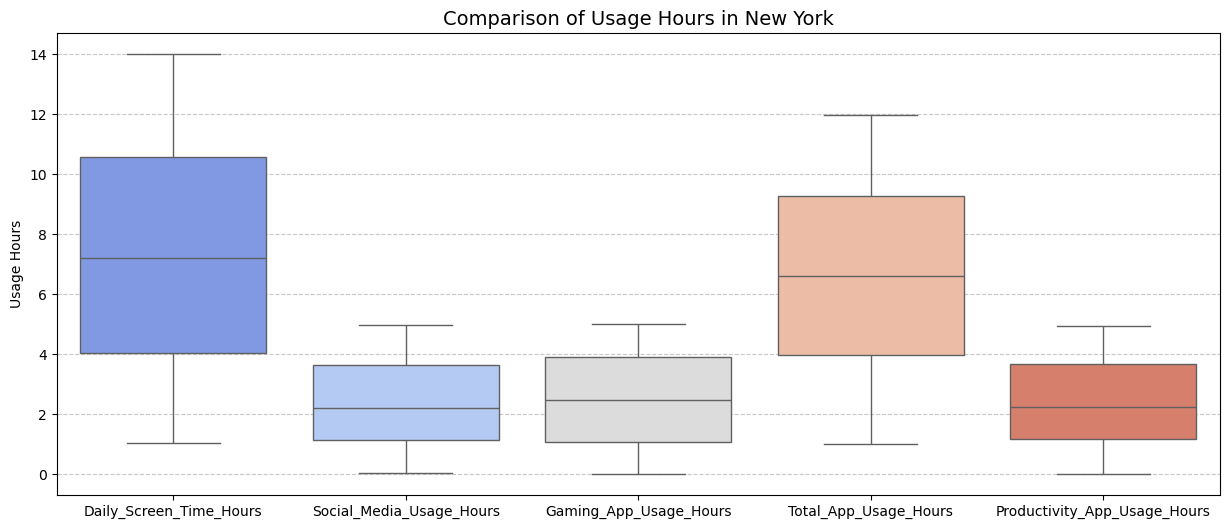

In [9]:
ny_df = usage_df[usage_df['Location'] == 'New York']
plt.figure(figsize=(15, 6))

sns.boxplot(data=ny_df[['Daily_Screen_Time_Hours', 'Social_Media_Usage_Hours', 'Gaming_App_Usage_Hours', 'Total_App_Usage_Hours','Productivity_App_Usage_Hours' ]], palette='coolwarm')

plt.title('Comparison of Usage Hours in New York', fontsize=14)
plt.ylabel('Usage Hours')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Here, we can visualize the average of each feature based on data from the New York rows. We can see the city's average screen time, social media usage, gaming usage, total app usage, and productivity usage.

We can see that the majority of users in New York have a screen time ranging from 4 to 10.5 hours, an average social media usage time of approximately 1.75 to 3.8 hours, an average gaming time of around 1.75 to 4 hours, an average total app usage ranging from 4 to 9.75 hours, and a productivity usage time ranging from 1.75 to 3.8 hours.

Now lets compare all cities to each other

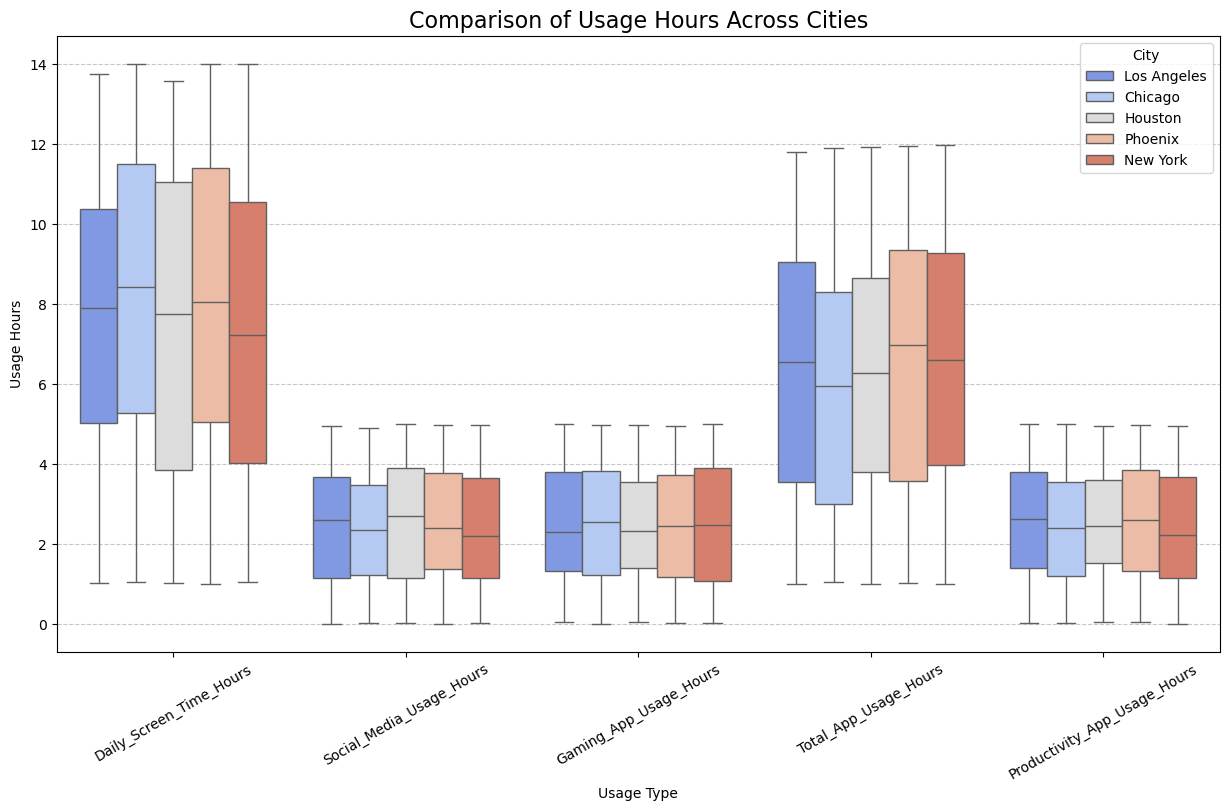

In [10]:
selected_cities = ['Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'New York']
city_df = usage_df[usage_df['Location'].isin(selected_cities)]

melted_df = city_df.melt(id_vars=['Location'], 
                          value_vars=['Daily_Screen_Time_Hours', 'Social_Media_Usage_Hours', 
                                      'Gaming_App_Usage_Hours', 'Total_App_Usage_Hours', 
                                      'Productivity_App_Usage_Hours'], 
                          var_name='Usage Type', 
                          value_name='Hours')

# Create a grouped boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_df, x='Usage Type', y='Hours', hue='Location', palette='coolwarm')

plt.title('Comparison of Usage Hours Across Cities', fontsize=16)
plt.xlabel('Usage Type')
plt.ylabel('Usage Hours')
plt.xticks(rotation=30)
plt.legend(title='City')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Lets look at each feature and see what city ranks the highest in each. 

1. Daily Screen Time: Chicago barely surpasses Phoenix, having the highest median screen time, while Houston has the lowest median.
2. Gaming App Usage: Chicago has the highest median gaming usage, while Houston and Los Angeles are tied for the lowest.
3. Productivity App Usage: Los Angeles and Phoenix are tied for the highest median, while New York has the lowest.
4. Social Media Usage: Houston has the highest median social media usage, while New York has the lowest.
5. Total App Usage: Phoenix leads with the highest median total app usage, while Chicago has the lowest.

## Whats the takeaway?

This dataset consists of identifying patterns in how mobile devices are used. We can see that people between the ages of 18-27 spend the most time on their phones, with the majority of them being men. Men's mental health and suicide rates have been widely discussed topics recently, so we can use this data to explore potential correlations between phone usage and mental well-being.

The average screen time for all age groups is over 7 hours, with social media being one of the main contributors to this high usage. One possible concern is that factors such as work/study time, physical activity, and other lifestyle habits are not included in this dataset. Incorporating these aspects could help us better understand how mobile device usage impacts overall well-being.

Another concern is that visualizations might unintentionally suggest causation rather than correlation. For example, if we observe that young adults with high screen time also report lower well-being, it does not necessarily mean that screen time is the cause. External factors such as socioeconomic status, lifestyle, or personal circumstances could play a significant role.

##  References 

1. Dataset:  https://www.kaggle.com/datasets/bhadramohit/smartphone-usage-and-behavioral-dataset/data
2. pandas.melt help: https://www.geeksforgeeks.org/python-pandas-melt/
    1. https://stackoverflow.com/questions/67663146/how-to-create-boxplots-by-group-for-all-dataframe-columns
3. pivot table-heat map help: https://builtin.com/data-science/pandas-pivot-tables
    1. https://builtin.com/data-science/pandas-pivot-tables

#### Note
This dataset is different from the one originally used in the draft. The original dataset was too uniform, making it difficult to analyze and derive meaningful insights.